Download Breast Cancer Wisconsin Data or you can use Kaggle
How many features are there and what is the data type of features?
What are the statistical properties of features?
Is there any missing value in data set?
If yes, how can you solve missing value problem?
Is there any outlier in data set?
If yes, how can you solve outlier problem?
What is the correlation between features?
Why some features have high correlation with each other?

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns #for HeatMap
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Firstly, using "read_csv", we should input data file which will work on. I named "bswData" to data for my codes. Afterwards, using ".info()", we can learn information about data such as the number of features or data type of features. I learned that data file has got 569 entries. Some of these entries are float, object and int. It has got 33 columns and 31 of these columns(features) are float64, one of them is object and another one is int64. Other information are written follow as output.

In [3]:
bcwData = pd.read_csv("/content/drive/MyDrive/machine learning projects/training set/breast cancer/data.csv") #for read data that will use
bcwData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

For learn statistical properties such as the mean, range and variance of the size, we use ".describe()". After I used that, I can see all integer and float datas' mean, standard deviation, min and max values. These informations are follows as output.

In [4]:
bcwData.describe() #for learn statistical propoerties

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


We can learn whether there is any missing value checking data file's informations with ".info()". There are not any NaN value from 0 index to 31 index but 32 index has got NaN values.

In [5]:
bcwData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

32th column's all values are NaN (Not a Number). There are two way for get rid of NaN values :

Samples of missing data can be extracted from the data.
Missing data can be filled according to the mean or median values of the original data, without disturbing the distribution of the original data. Because 32th column's all values are NaN and we can't fix these values, this column should be extracted from the data.

In [6]:
bcwData.drop('Unnamed: 32', axis=1, inplace=True) #for delete 32 index column
bcwData.head(3) #After delete "Unnamed: 32" column, Let's look at the first three rows. 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


We use ".corr()" to find correlation between features.

If correlation between two features is 1 or the number close of 1, these features are directly proportional
if correlation between two features is -1 or the number close of -1 these features are inverse proportional
if correlation between two features is 0 or the number close of 0, there is no correlation between these features.
For example, "radius_worst" and "radius_mean" are directly proportional. So, while one of them increaseing, another one increaseing,too.

According to correlation table which is follows, we can make inferences. However, It's hard read these table, therefore I decided use heatMap.

In [7]:
bcwData.corr() #Table which hard read

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


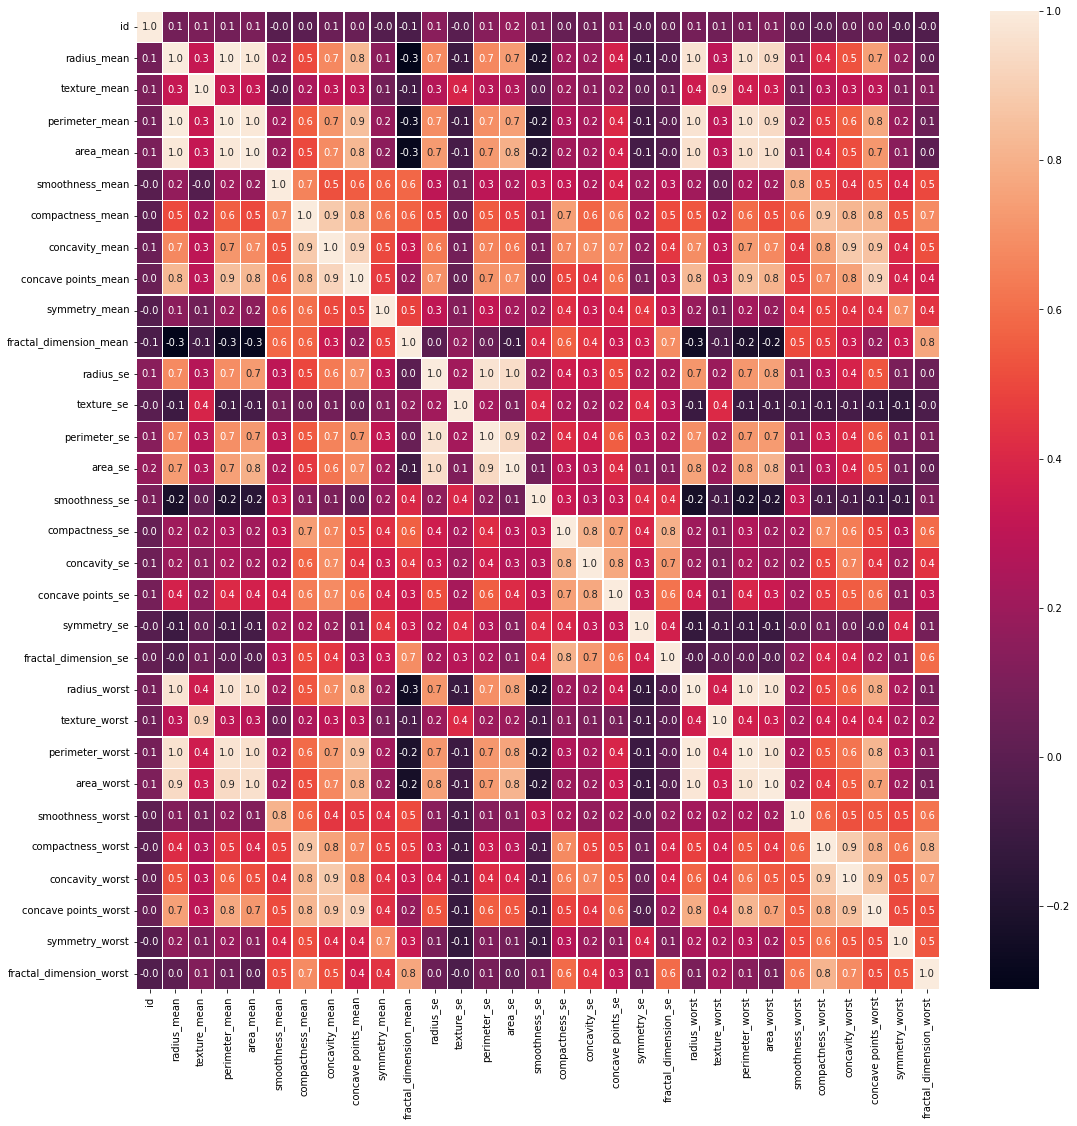

In [8]:
#table which easy read
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(bcwData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

The logistic regression works as follows:

The weights are multiplied by the input and the bias is added. z = (w.t)x + b
The output of the first item (z) is inserted into the sigmoid function.
Sigmoid function output is a possibility result.
If we want logistic regression to learn, we should continue as follows:

Sigmoid function output is inserted into the lost function.
The cost value is achieved by gathering the lost function outputs.
Change (derivative) is calculated by cost value.
The parameters are updated with the gradient descent.
The most suitable weights and bias values are obtained by repeating this process.

In [9]:
from sklearn.svm import SVC

y = bcwData["diagnosis"].values # target data
x_data = bcwData.drop(["diagnosis"],axis=1) # input data

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)) # normalization

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=1)  # split train, test data
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

print("Support Vector Machine Model Test Accuracy: {} ".format(svm.score(x_test,y_test)))

Support Vector Machine Model Test Accuracy: 0.9534883720930233 


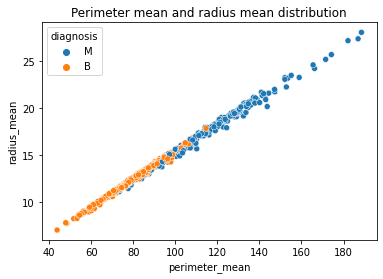

In [10]:
sns.scatterplot(x='perimeter_mean', y='radius_mean', hue='diagnosis', data=bcwData)
plt.title('Perimeter mean and radius mean distribution')
plt.show()

I have choose three machine learning algorithms among "Logistic Regression, KNN, SVM, Decision Tree, Random Forest". There are "Logistic Regression", "SVM"and "KNN". Let's run them one by one and compare the results.

Logistic Regression Test Accuracy > Support Vector Machine Model Test Accuracy > 9 Nearest Neighbor Model Test Accuracy

In [29]:
#Logistic Regression

y = bcwData["diagnosis"].values
x_data = bcwData.drop(["diagnosis"],axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)

test_accuracy  = lr.score(x_test.T,y_test.T)
print("Test Accuracy: {}".format(test_accuracy))

Test Accuracy: 0.9767441860465116


In [27]:
#KNN

y = bcwData["diagnosis"].values
x_data = bcwData.drop(["diagnosis"],axis=1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split
# % 15 test,  % 85 eğitim
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 9
knn = KNeighborsClassifier(n_neighbors = komsu_sayisi) 
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print(" {} Nearest Neighbor Model Test Accuracy: {} ".format(komsu_sayisi,knn.score(x_test,y_test)))

 9 Nearest Neighbor Model Test Accuracy: 0.9418604651162791 


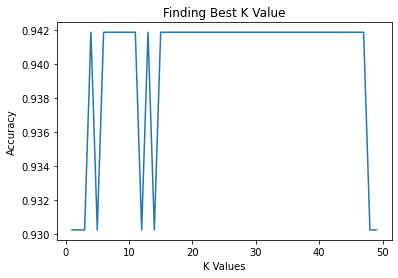

In [13]:
#Finding the Best K Value

score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,50),score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Finding Best K Value")
plt.show()

In [26]:
#SVM

from sklearn.svm import SVC

y = bcwData["diagnosis"].values
x_data = bcwData.drop(["diagnosis"],axis=1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=1)
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

print("Support Vector Machine Model Test Accuracy: {} ".format(svm.score(x_test,y_test)))

Support Vector Machine Model Test Accuracy: 0.9534883720930233 
